#### Import of Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [4]:
df = pd.read_csv('datatest.csv')
df=df.head(1000)
df=df.drop(columns=["id","date"])

In [5]:
df.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [6]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    1000 non-null   float64
 1   Humidity       1000 non-null   float64
 2   Light          1000 non-null   float64
 3   CO2            1000 non-null   float64
 4   HumidityRatio  1000 non-null   float64
 5   Occupancy      1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB
Number of duplicated rows is:  50
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

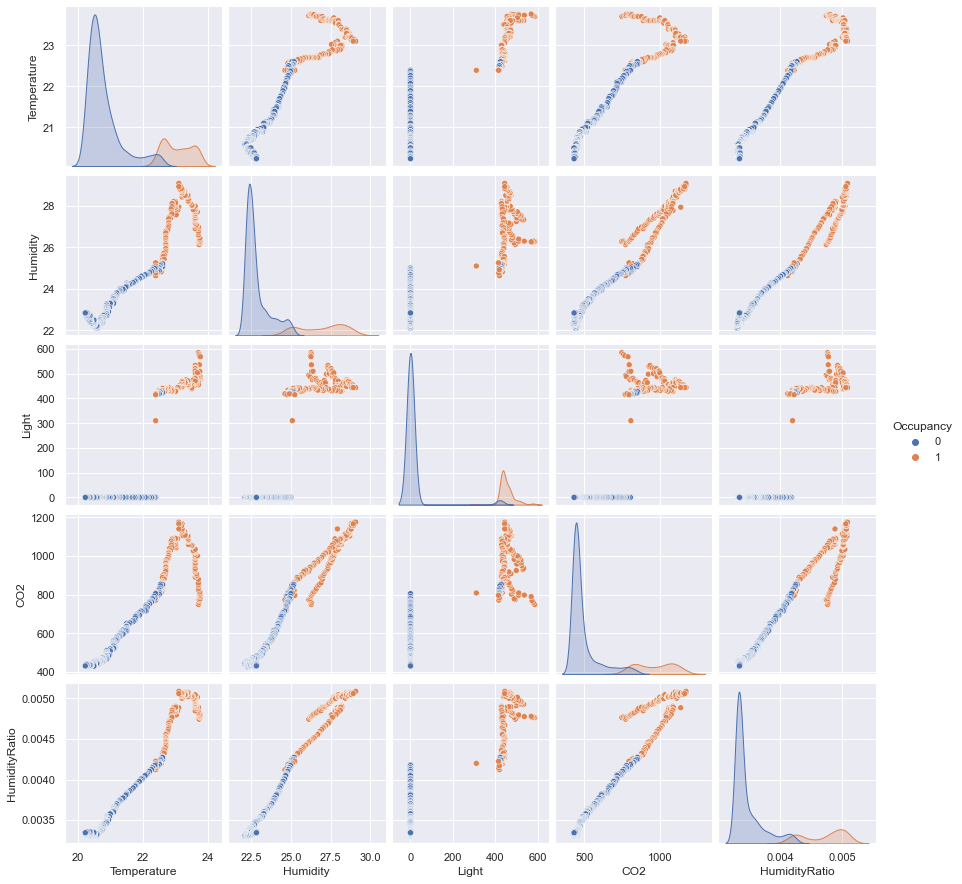

In [7]:
sns.pairplot(df, hue='Occupancy')
plt.show()

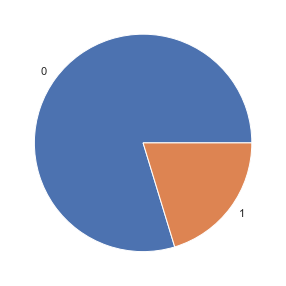

In [8]:
y =df['Occupancy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [9]:
X = df.drop(columns=['Occupancy'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,1000.0,21.250870,1.043438,20.236000,20.500000,20.722500,22.066667,23.760000
Humidity,1000.0,23.674400,1.885791,22.100000,22.390000,22.700000,24.635417,29.075000
Light,1000.0,101.583907,188.704714,0.000000,0.000000,0.000000,0.000000,585.200000
CO2,1000.0,588.440542,216.636189,427.500000,439.750000,459.583333,717.033333,1176.166667
HumidityRatio,1000.0,0.003719,0.000559,0.003303,0.003327,0.003391,0.004047,0.005088


#### Standardize the Data

In [10]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,1000.0,1.080025e-15,1.0005,-0.973108,-0.719972,-0.506628,0.782227,2.405879
Humidity,1000.0,4.547474e-16,1.0005,-0.835293,-0.681434,-0.516965,0.509864,2.865272
Light,1000.0,1.136868e-16,1.0005,-0.538591,-0.538591,-0.538591,-0.538591,2.564102
CO2,1000.0,-2.842171e-16,1.0005,-0.743279,-0.686704,-0.595107,0.593886,2.714321
HumidityRatio,1000.0,3.979039e-16,1.0005,-0.743603,-0.700501,-0.586102,0.587066,2.449111


#### Observations and Variables

In [11]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

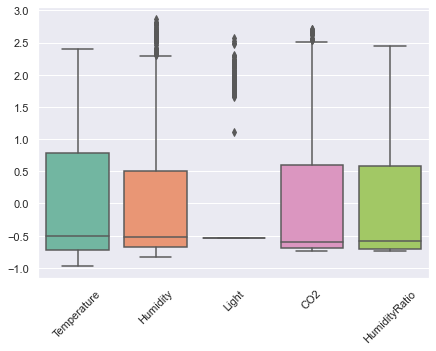

In [12]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

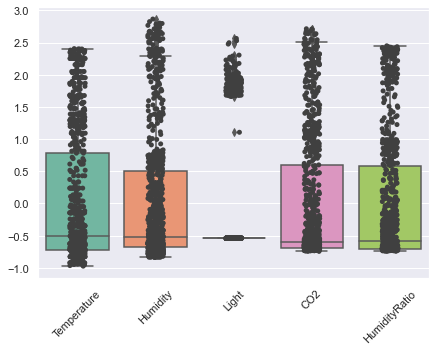

In [13]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

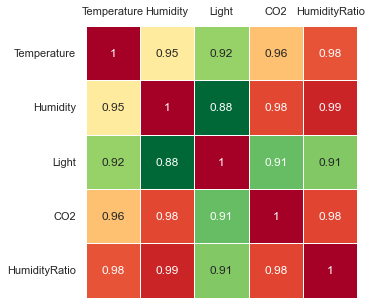

In [14]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [15]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [1] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [16]:
out['PC']

,PC1
0,3.964621
1,3.991397
2,3.982382
3,3.766973
4,3.814073
...,...
995,-1.492868
996,-1.457645
997,-1.464368
998,-1.495686


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'1 Principal Components explain [98.66%] of the variance'}, xlabel='PC1 (95.8% expl.var)', ylabel='PC2 (0% expl.var)'>)

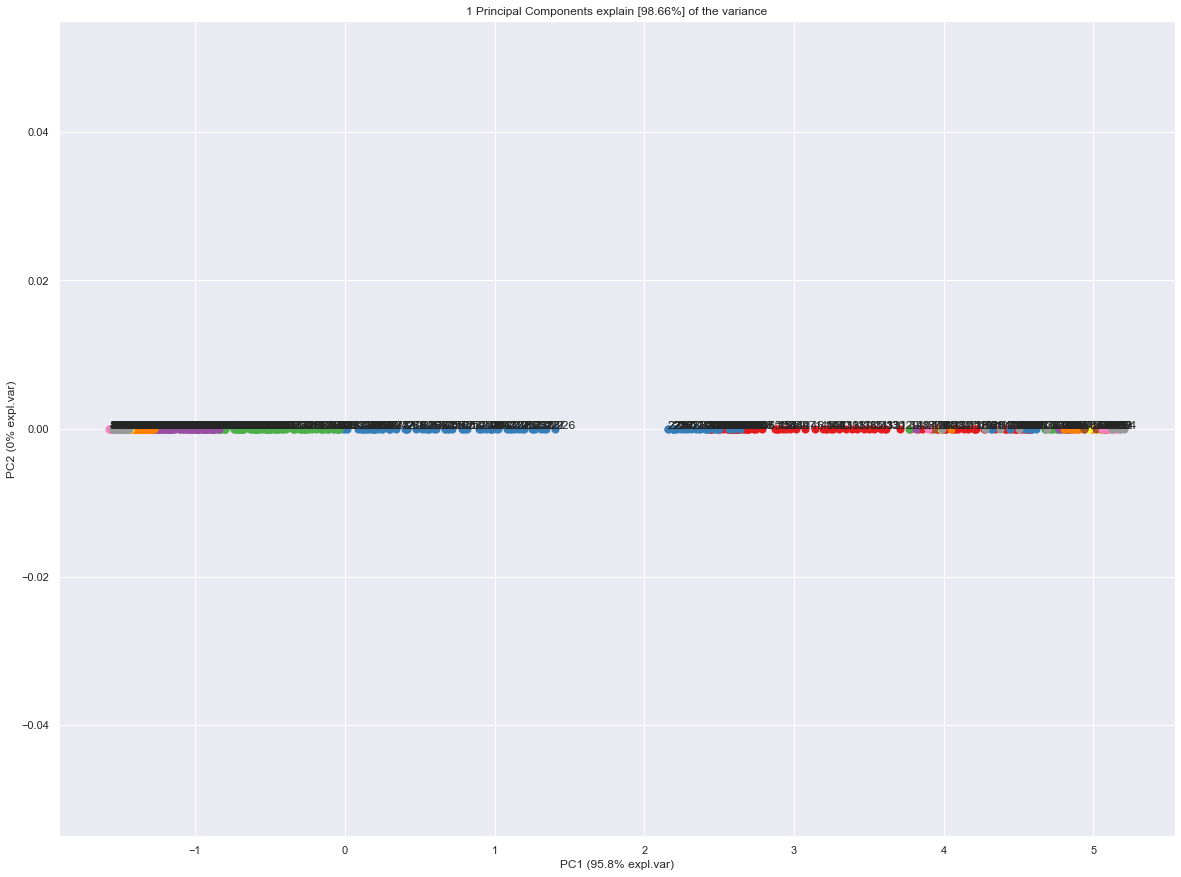

In [17]:
model.scatter(label=True, legend=False)

Eigenvectors

In [18]:
A = out['loadings'].T

In [19]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

ValueError: Could not interpret value `PC2` for parameter `y`

#### Scree Plot

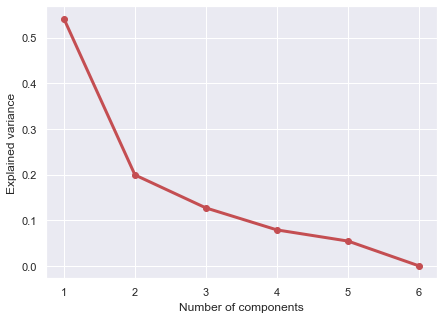

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

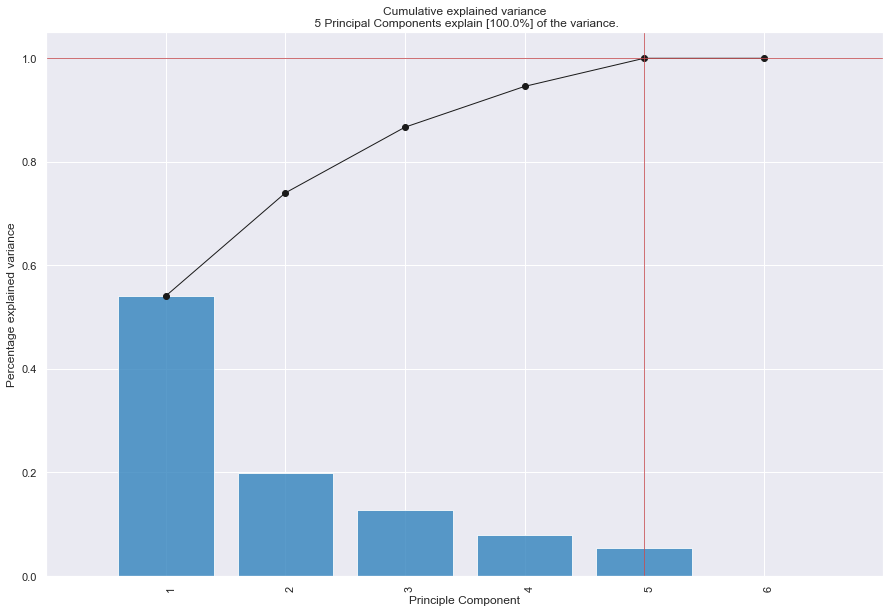

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();